# Decision Tree Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Employee attrition poses a critical challenge to organizational stability and growth. This project aims to develop a machine learning model that predicts whether an employee is likely to leave the company based on HR-related numerical features such as satisfaction level, work hours, and time spent at the company. Accurate predictions can help HR teams proactively address employee concerns, improve retention strategies, and reduce turnover-related costs

**Problem**： What’s likely to make the employee leave the company?

In [ ]:
df = pd.read_csv("HR_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

3008

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(11991, 10)

In [7]:
df['left'].value_counts()        # Imbalanced dataset

left
0    10000
1     1991
Name: count, dtype: int64

In [8]:
df['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [9]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [10]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
# Feature Encoding - One Hot Encoding and Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded = le.fit_transform(df['salary'])
encoded_df = pd.DataFrame(encoded, columns=['Salary'])

df.drop(columns='salary', inplace=True)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [13]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
encoded = onehot.fit_transform(df[['Department']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=onehot.get_feature_names_out())

df.drop(columns='Department', inplace=True)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df.shape

(11991, 19)

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [16]:
#Independent Feature and dependent feature
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical']]
y = df['left']

In [17]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X.shape

(11991, 18)

In [19]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11986    0
11987    0
11988    0
11989    0
11990    0
Name: left, Length: 11991, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
X_train.shape, X_test.shape

((8393, 18), (3598, 18))

In [22]:
# Standard Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Model Training
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

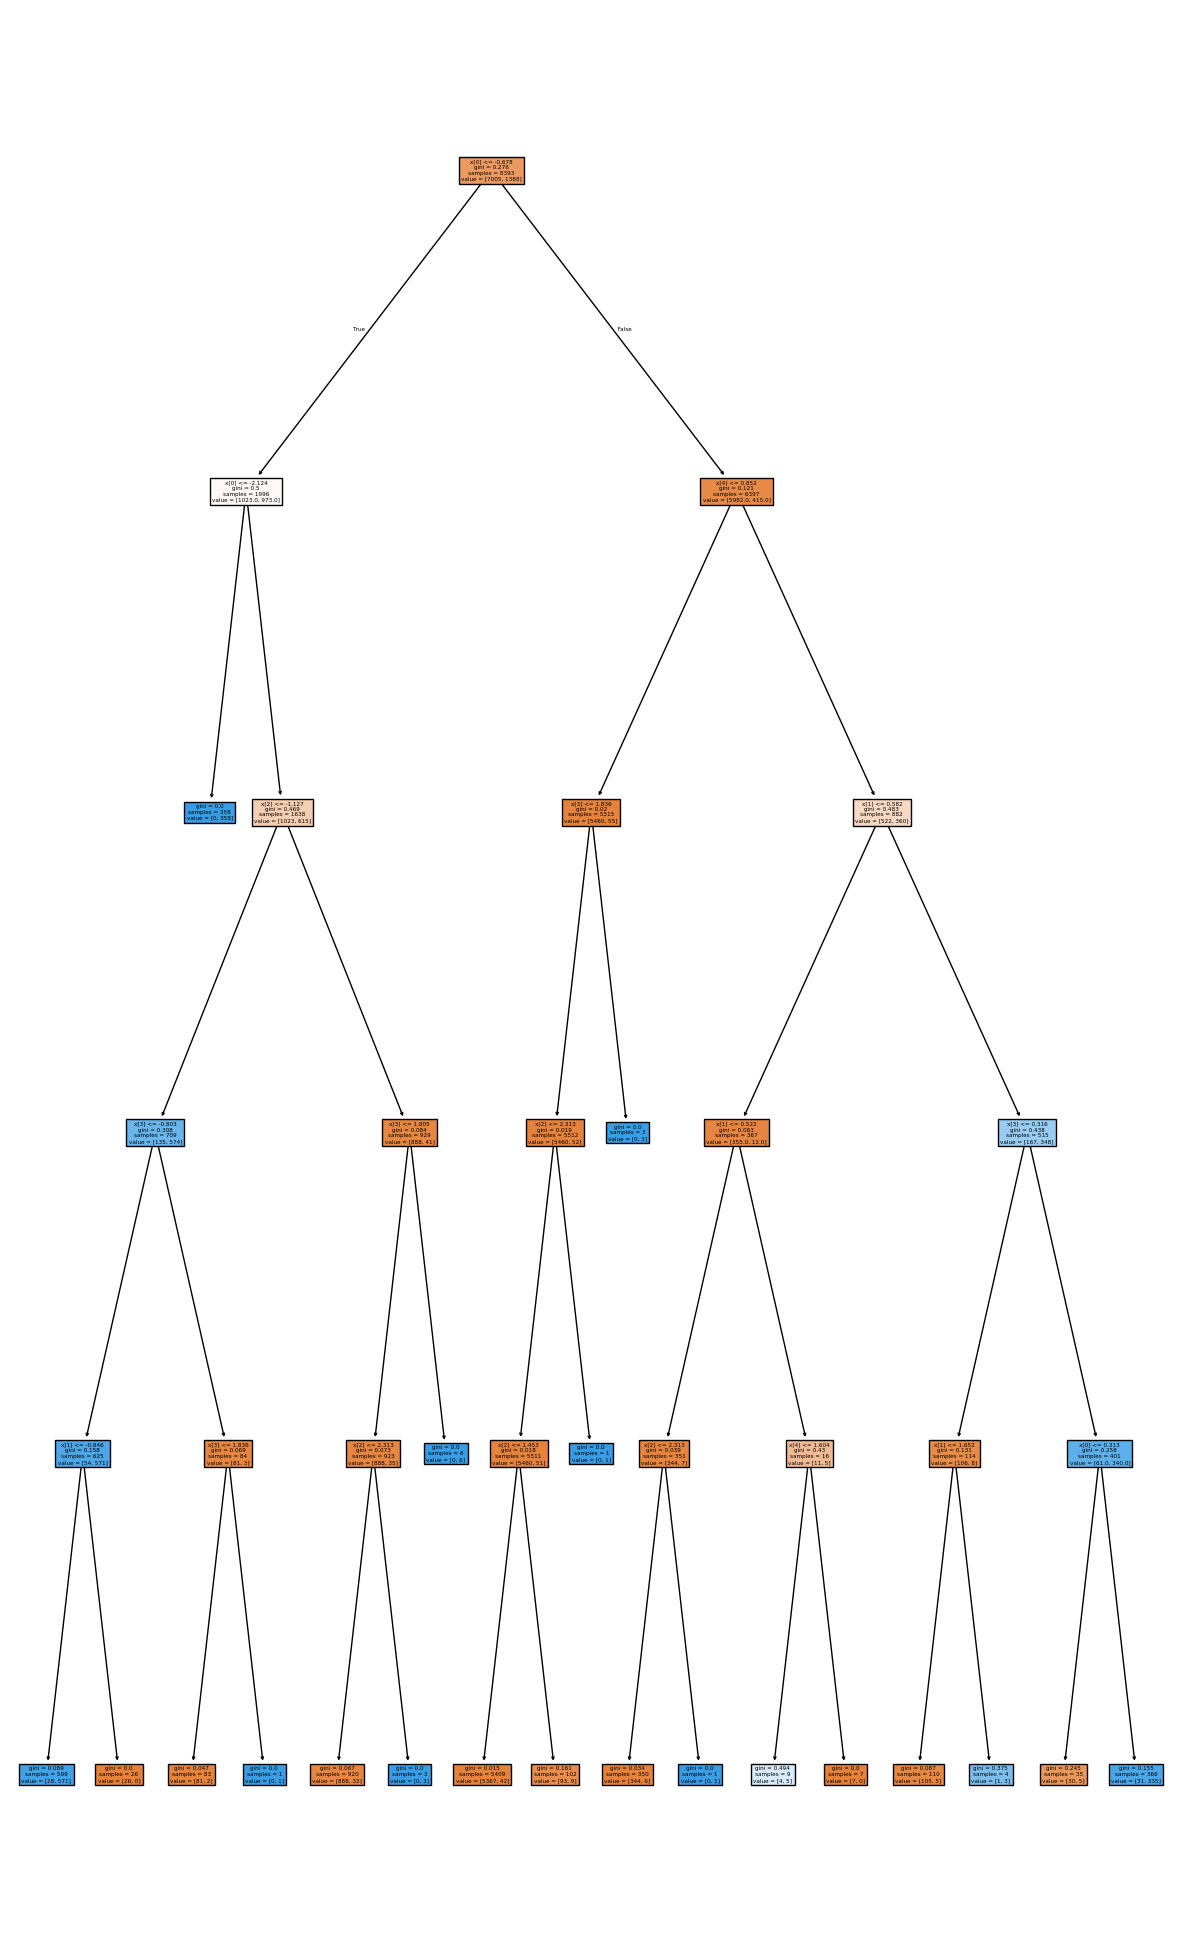

In [24]:
from sklearn import tree
plt.figure(figsize=(15,25))
plt.show(tree.plot_tree(dtree,filled=True))

In [25]:
y_pred = dtree.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
cm = confusion_matrix(y_test,y_pred)
print("\nConfusion matrix: \n",cm)

print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9766536964980544

Confusion matrix: 
 [[2961   34]
 [  50  553]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.94      0.92      0.93       603

    accuracy                           0.98      3598
   macro avg       0.96      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598



In [26]:
# As I can observe that we have relatively less ratio of True:False in some internal nodes at depth=4. So we can post-prune the tree at max_depth=4 
# to reduce overfitting

NOTE: Post-Pruning is generally done for small dataset with less features, whereas Pre-Pruning is done for large datasets.

Here, in this case, since the dataset is large, we prefer Pre-Pruning! We did Post-Pruning just for an example.

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

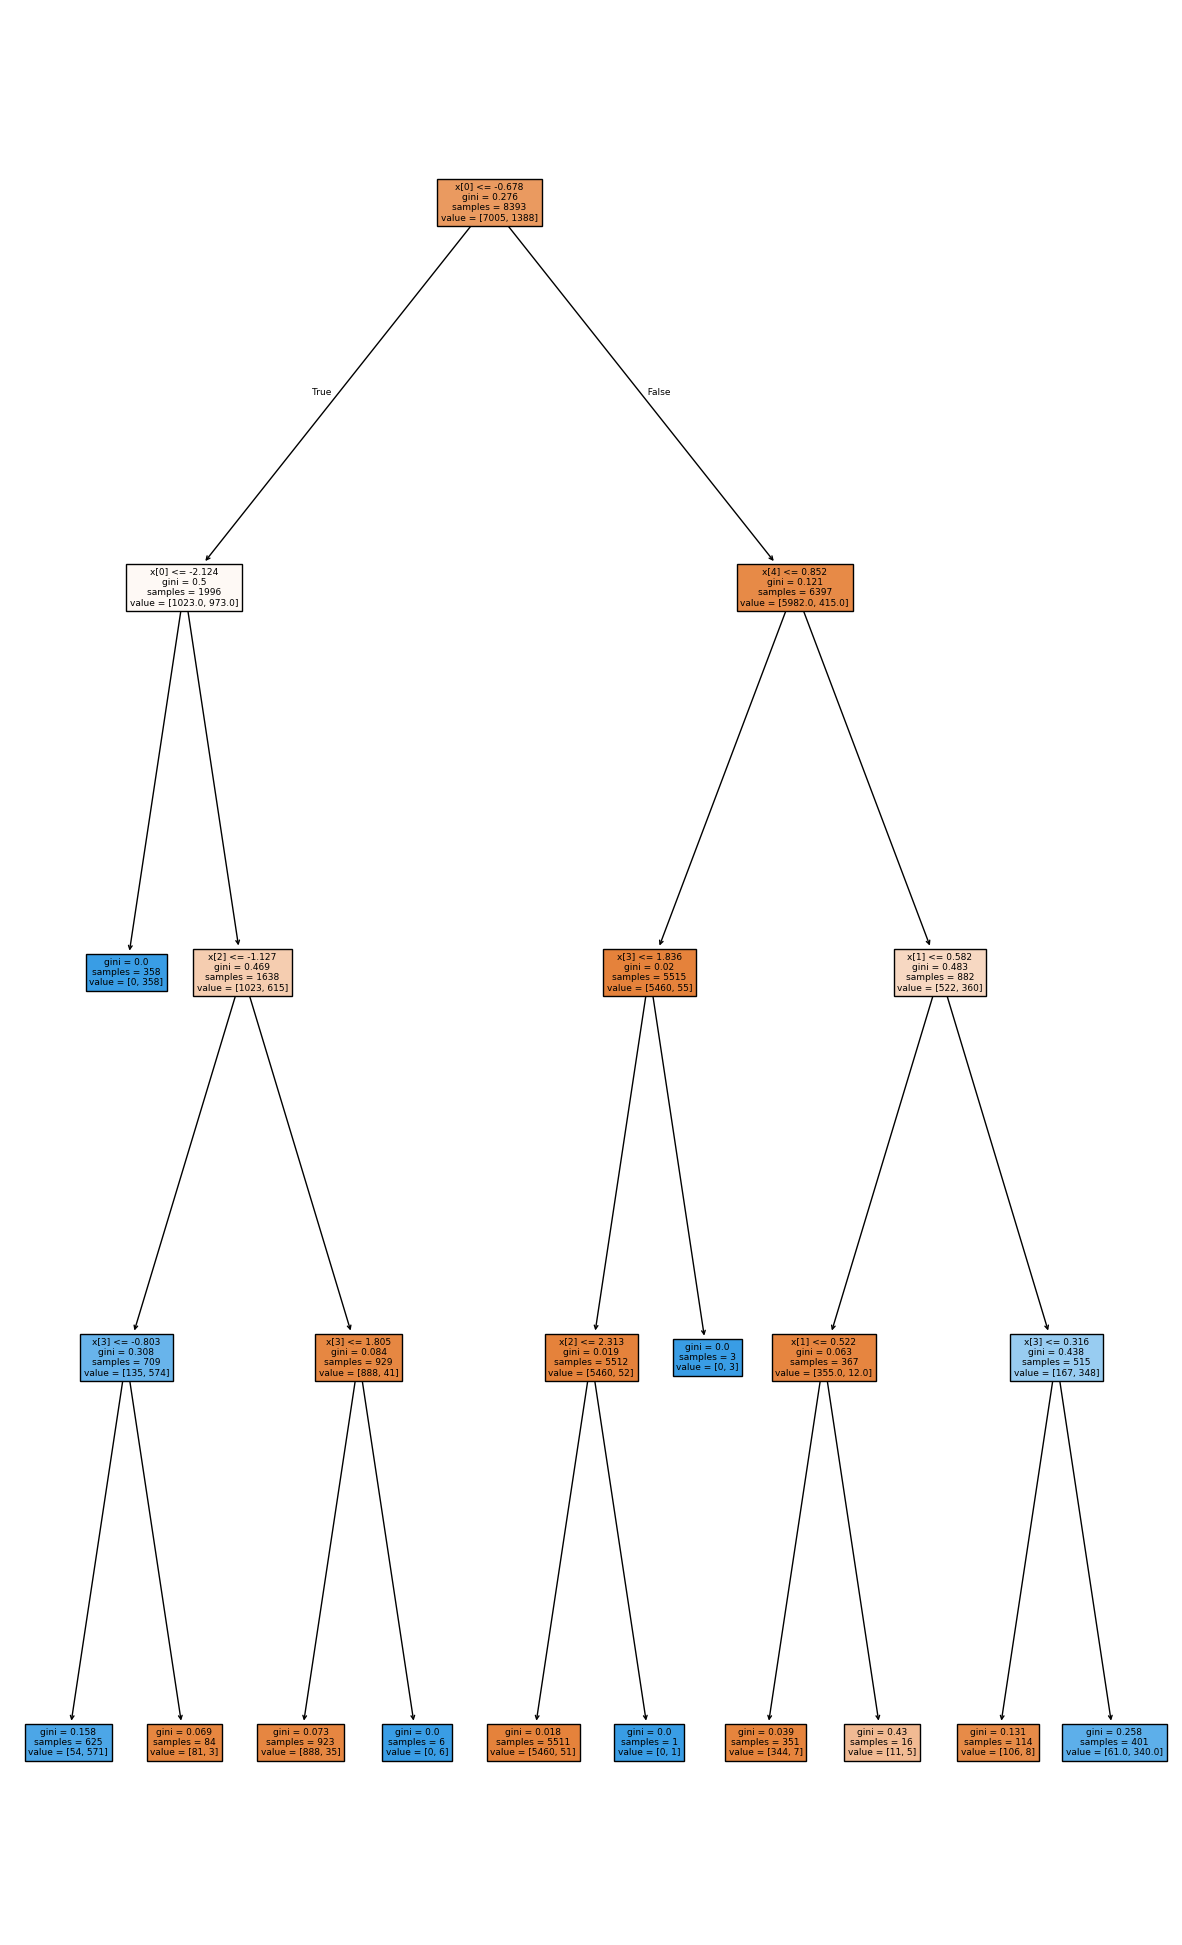

In [28]:
from sklearn import tree
plt.figure(figsize=(15,25))
plt.show(tree.plot_tree(dtree,filled=True))

In [29]:
y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
# Performance metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
cm = confusion_matrix(y_test,y_pred)
print("\nConfusion matrix: \n",cm)

print("\nClassification Report: \n",classification_report(y_test,y_pred))   # From post-pruning, getting low accuracy!

Accuracy:  0.9677598665925514

Confusion matrix: 
 [[2934   61]
 [  55  548]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2995
           1       0.90      0.91      0.90       603

    accuracy                           0.97      3598
   macro avg       0.94      0.94      0.94      3598
weighted avg       0.97      0.97      0.97      3598



## Hyperparameter Tuning & Cross-Validation

In [32]:
# Trying all the possible parameters of LogisticRegression() # See the documentation to know about parameters
model = DecisionTreeClassifier()

In [33]:
param_grid = { 'criterion': ['gini', 'entropy','log_loss'], 
              'splitter': ['best', 'random'], 
              'max_depth': [1,2,3,4,5,6,7,8,9,10],  
              'max_features': [None,'sqrt', 'log2'], 
              'min_samples_leaf': [1, 2, 5],  
              'min_impurity_decrease': [0.0, 0.01, 0.05]
            }

In [34]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv=StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=cv,n_jobs=-1,refit=True,verbose=3,error_score='raise')

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise', estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.01, 0.05],
                         'min_samples_leaf': [1, 2, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [36]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [37]:
grid.best_score_    # This is the best accuracy we can get!

0.9833195024281581

In [38]:
y_pred = grid.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
cm = confusion_matrix(y_test,y_pred)
print("\nConfusion matrix: \n",cm)

print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9822123401889938

Confusion matrix: 
 [[2981   14]
 [  50  553]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       0.98      0.92      0.95       603

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598



In [40]:
# This says that the model is performing not very good!

# Randomized Search CV

In [41]:
from sklearn.model_selection import RandomizedSearchCV
randomcv = RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=cv,scoring='accuracy')

In [42]:
randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.05],
                                        'min_samples_leaf': [1, 2, 5],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [43]:
randomcv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.0,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [44]:
randomcv.best_score_

0.9549672353073548

In [45]:
y_pred = randomcv.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
cm = confusion_matrix(y_test,y_pred)
print("\nConfusion matrix: \n",cm)

print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9769316286826014

Confusion matrix: 
 [[2968   27]
 [  56  547]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.95      0.91      0.93       603

    accuracy                           0.98      3598
   macro avg       0.97      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598

